[Autoencoder](https://medium.com/@birla.deepak26/autoencoders-76bb49ae6a8f)

![Autoencoder](img/autoencoder.webp)

-- Autoencoder-based anomaly detection model using TensorFlow and Keras.

###  How It Works:
- The Autoencoder is trained to reconstruct normal data.

- If an input deviates significantly (i.e., high reconstruction error), it is classified as an anomaly.



In [1]:
%load_ext autoreload
%autoreload 2

### Step 2: Import Required Libraries

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Step 3: Generate or Load Data

In [10]:
# Generate normal data (sine wave)
t = np.linspace(0, 100, 1000)
normal_data = np.sin(t) + 0.1 * np.random.randn(1000)

In [11]:
type(normal_data)

numpy.ndarray

In [13]:
# Introduce anomalies (random spikes)
anomaly_indices = np.random.choice(1000, 50, replace=False)
anomalies = normal_data.copy()
anomalies[anomaly_indices] += np.random.uniform(3, 5, size=50)


In [14]:
# Combine normal and anomaly data
data = np.concatenate([normal_data, anomalies]).reshape(-1, 1)

In [15]:
# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [16]:
data_scaled.shape

(2000, 1)

In [17]:
# Split data into training (normal only) and testing (normal + anomalies)
X_train, X_test = train_test_split(data_scaled[:1000], test_size=0.2, random_state=42)
X_test = np.concatenate([X_test, data_scaled[1000:]])  # Add anomalies to test set


### Autoencoder model

In [ ]:
# Define Autoencoder architecture
input_dim = X_train.shape[1]

autoencoder = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(input_dim,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

# Compile model
autoencoder.compile(optimizer='adam', loss='mse')

# Train model on normal data
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, validation_data=(X_test, X_test))


### Step 5: Detect Anomalies

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


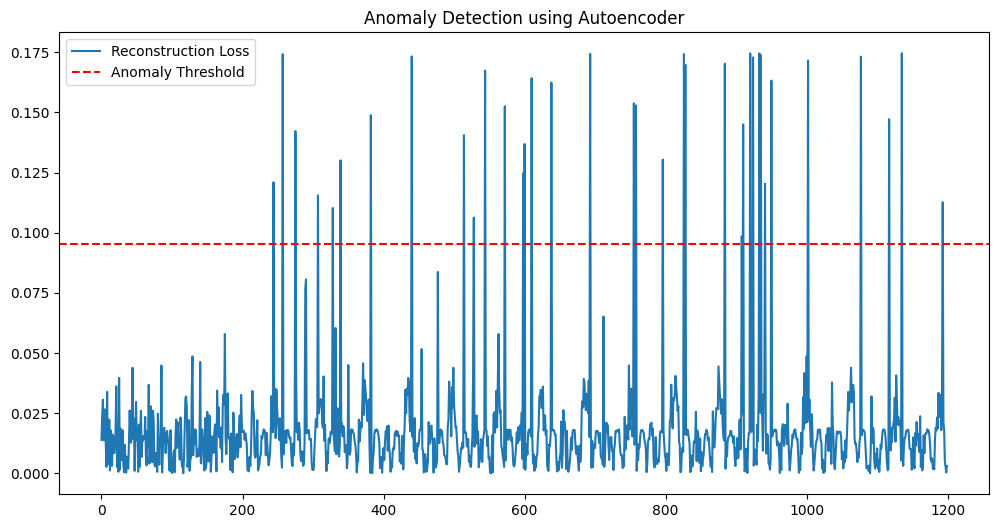

Total anomalies detected: 36


In [19]:
# Compute reconstruction loss (MSE)
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.abs(X_test - X_test_pred), axis=1)

# Set threshold (mean + 3 * std)
threshold = np.mean(mse) + 3 * np.std(mse)

# Identify anomalies
anomalies = mse > threshold

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(mse, label="Reconstruction Loss")
plt.axhline(y=threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.legend()
plt.title("Anomaly Detection using Autoencoder")
plt.show()

# Print number of detected anomalies
print(f"Total anomalies detected: {np.sum(anomalies)}")


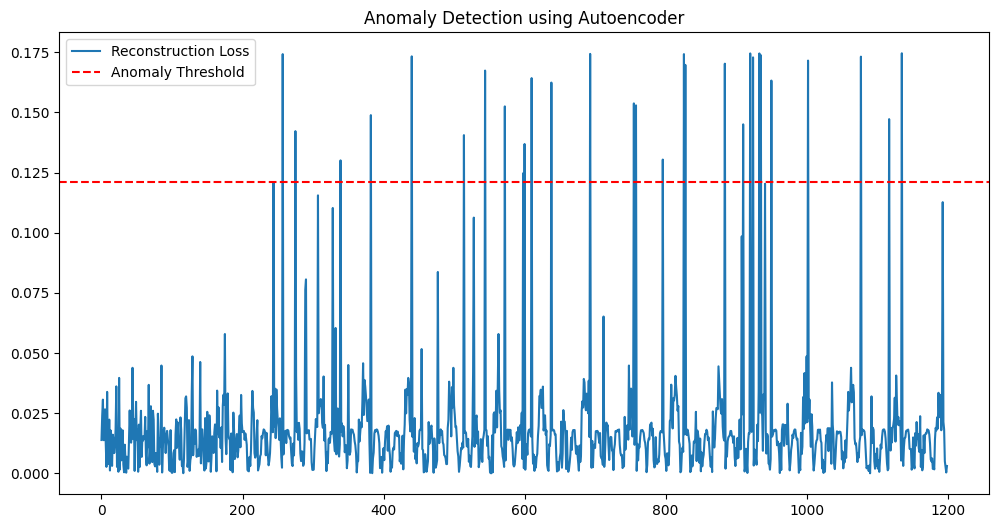

Total anomalies detected: 30


In [20]:
# Set threshold (mean + 3 * std)
threshold = np.mean(mse) + 4 * np.std(mse)

# Identify anomalies
anomalies = mse > threshold

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(mse, label="Reconstruction Loss")
plt.axhline(y=threshold, color='r', linestyle='--', label="Anomaly Threshold")
plt.legend()
plt.title("Anomaly Detection using Autoencoder")
plt.show()

# Print number of detected anomalies
print(f"Total anomalies detected: {np.sum(anomalies)}")